In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import matplotlib as mpl
mpl.style.use('ggplot')
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
%matplotlib inline

Matplotlib version:  3.1.1


In [34]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [35]:
df = df.drop(labels=None, axis=0, index=None, columns=['INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','SEGLANEKEY','CROSSWALKKEY','OBJECTID','SDOT_COLCODE','SDOT_COLDESC','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLCODE','ST_COLDESC',],level=None, inplace=False, errors='raise')
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,...,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,...,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,...,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,...,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,N
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,...,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,N


In [53]:
df = df[df['X'].notna()]
df = df[df['Y'].notna()]
df['WEATHER'].replace(['Unknown'], np.nan,inplace=True)
df = df[df['WEATHER'].notna()]
df['ROADCOND'].replace(['Unknown'], np.nan,inplace=True)
df = df[df['ROADCOND'].notna()]
df['LIGHTCOND'].replace(['Unknown'], np.nan,inplace=True)
df = df[df['LIGHTCOND'].notna()]


In [51]:
df.shape

(184167, 25)

In [46]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
HITPARKEDCAR       object
WEATHER_ID        float64
dtype: object

In [47]:
df_hissev = df['SEVERITYCODE'].value_counts()

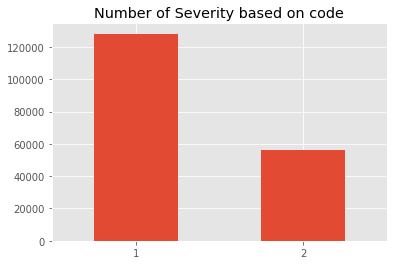

In [48]:
df_hissev.plot.bar(x="SEVERITYCODE", y="Count", rot=0, title="Number of Severity based on code");

plt.show(block=True);

In [54]:
df_hiswea = df['WEATHER'].value_counts()
df_hiswea.reset_index()

,index,WEATHER
0,Clear,106875
1,Raining,31619
2,Overcast,26429
3,Snowing,819
4,Fog/Smog/Smoke,539
5,Other,242
6,Sleet/Hail/Freezing Rain,110
7,Blowing Sand/Dirt,43
8,Severe Crosswind,24
9,Partly Cloudy,5


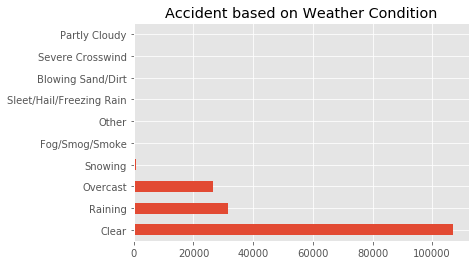

In [55]:
df_hiswea.plot.barh(x="SEVERITYCODE", y="Count", rot=0, title="Accident based on Weather Condition")
plt.show(block=True)

In [56]:
df_hisroad = df['ROADCOND'].value_counts()
df_hisroad.reset_index()

,index,ROADCOND
0,Dry,119406
1,Wet,45095
2,Ice,1071
3,Snow/Slush,833
4,Other,98
5,Standing Water,95
6,Sand/Mud/Dirt,57
7,Oil,50


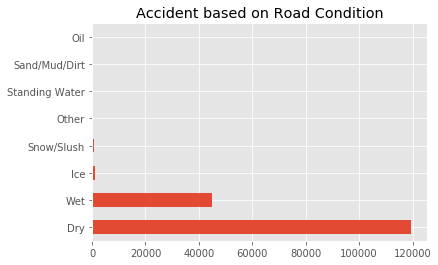

In [57]:
df_hisroad.plot.barh(x="SEVERITYCODE", y="Count", rot=0, title="Accident based on Road Condition")
plt.show(block=True)

In [58]:
df_hislight = df['LIGHTCOND'].value_counts()
df_hislight.reset_index()

,index,LIGHTCOND
0,Daylight,110520
1,Dark - Street Lights On,45711
2,Dusk,5545
3,Dawn,2347
4,Dark - No Street Lights,1339
5,Dark - Street Lights Off,1074
6,Other,160
7,Dark - Unknown Lighting,9


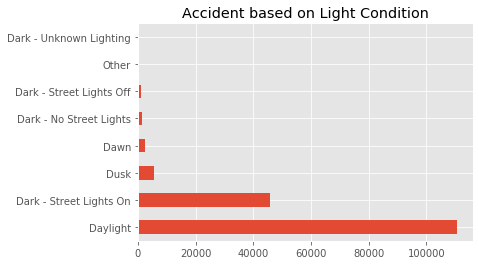

In [59]:
df_hislight.plot.barh(x="SEVERITYCODE", y="Count", rot=0, title="Accident based on Light Condition")
plt.show(block=True)

In [60]:
df_hisloc = df['LOCATION'].value_counts().head(10)
df_hisloc.reset_index()

,index,LOCATION
0,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,251
1,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,240
2,6TH AVE AND JAMES ST,236
3,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,226
4,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,217
5,WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON...,206
6,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,166
7,RAINIER AVE S BETWEEN S HENDERSON ST AND S DIR...,147
8,5TH AVE AND SPRING ST,145
9,1ST AVE BETWEEN BLANCHARD ST AND BELL ST,139


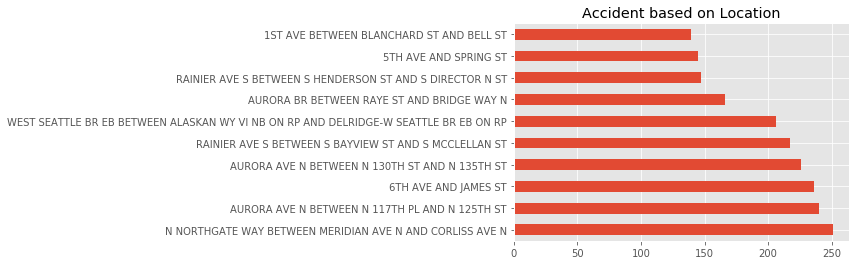

In [61]:
df_hisloc.plot.barh(x="SEVERITYCODE", y="Count", rot=0, title="Accident based on Location")
plt.show(block=True)

In [16]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins
print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [18]:
latitude = 47.603363
longitude = -122.330417

seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

seattle_map

In [63]:
df['WEATHER_ID'] = df['WEATHER'].replace(to_replace=[
'Clear',
'Raining',
'Overcast',
'Snowing',
'Other',                                       
'Fog/Smog/Smoke',
'Sleet/Hail/Freezing Rain',
'Blowing Sand/Dirt',
'Severe Crosswind',
'Partly Cloudy']
,value=[1,2,3,4,5,6,7,8,9,10])

df['ROAD_ID'] = df['ROADCOND'].replace(to_replace=[
'Dry',
'Wet',
'Ice',
'Snow/Slush',
'Other',
'Standing Water',
'Sand/Mud/Dirt',
'Oil']
,value=[1,2,3,4,5,6,7,8])

df['LIGHT_ID'] = df['LIGHTCOND'].replace(to_replace=[
'Daylight',
'Dark - Street Lights On',
'Dusk',
'Dawn',
'Dark - No Street Lights',
'Dark - Street Lights Off',
'Other',
'Dark - Unknown Lighting']
,value=[1,2,3,4,5,6,7,8])

In [64]:
df.WEATHER_ID.astype(int)

0         3
1         2
2         3
3         1
4         2
         ..
194668    1
194669    2
194670    1
194671    1
194672    1
Name: WEATHER_ID, Length: 166705, dtype: int32

In [65]:
df.ROAD_ID.astype(int)

0         2
1         2
2         1
3         1
4         2
         ..
194668    1
194669    2
194670    1
194671    1
194672    2
Name: ROAD_ID, Length: 166705, dtype: int32

In [66]:
df.LIGHT_ID.astype(int)

0         1
1         2
2         1
3         1
4         1
         ..
194668    1
194669    1
194670    1
194671    3
194672    1
Name: LIGHT_ID, Length: 166705, dtype: int32

In [67]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,WEATHER_ID,ROAD_ID,LIGHT_ID
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,...,NaN,N,Overcast,Wet,Daylight,NaN,N,3,2,1
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,...,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,N,2,2,2
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,...,NaN,0,Overcast,Dry,Daylight,NaN,N,3,1,1
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,...,NaN,N,Clear,Dry,Daylight,NaN,N,1,1,1
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,...,NaN,0,Raining,Wet,Daylight,NaN,N,2,2,1


### KNN

In [68]:
X = np.asarray(df[['WEATHER_ID', 'ROAD_ID','LIGHT_ID']] .values)  #.astype(float)
X[0:5]

array([[3, 2, 1],
       [2, 2, 2],
       [3, 1, 1],
       [1, 1, 1],
       [2, 2, 1]], dtype=int64)

In [69]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [70]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.71174445,  1.26999435, -0.56022029],
       [ 0.53070702,  1.26999435,  0.6752644 ],
       [ 1.71174445, -0.56446027, -0.56022029],
       [-0.65033041, -0.56446027, -0.56022029],
       [ 0.53070702,  1.26999435, -0.56022029]])

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (133364, 3) (133364,)
Test set: (33341, 3) (33341,)


In [72]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [73]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [74]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6706232566509702
Test set Accuracy:  0.6708856962898533


In [75]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.59863231, 0.6708857 , 0.64332204, 0.6708857 , 0.66965598,
       0.67079572, 0.63531388, 0.67061576, 0.66488708])

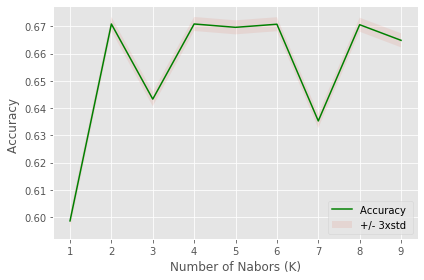

In [76]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [77]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.5484192629328207

In [78]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6648870759725263

### Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [93]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [94]:
DTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
predTree = DTree.predict(X_testset)

In [96]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [97]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6711389266576022


In [103]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5393189496069195

In [104]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6713355928136528

### Logestic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [83]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66258059, 0.33741941],
       [0.66258059, 0.33741941],
       [0.67875559, 0.32124441],
       ...,
       [0.67840944, 0.32159056],
       [0.66660727, 0.33339273],
       [0.66091408, 0.33908592]])

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[22383     0]
 [    0     0]]


Confusion matrix, without normalization
[[22383     0]
 [    0     0]]


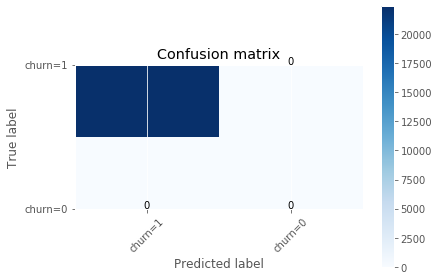

In [85]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [86]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.67      1.00      0.80     22383
           2       0.00      0.00      0.00     10958

    accuracy                           0.67     33341
   macro avg       0.34      0.50      0.40     33341
weighted avg       0.45      0.67      0.54     33341



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6713355928136528

In [106]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5393189496069195

In [107]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6327685830156192